In [1]:
from providers import MangaDex, MangaUpdates, ProviderExceptions
from komga.komga_connector import KomgaConnector
import time

komga_session = KomgaConnector()

In [2]:
from IPython.display import clear_output

In [3]:
series = komga_session.get_all_series("0BRVYVT1FHK5A")

In [4]:
def missing_metadata(komga_dict) -> bool:
    if(komga_dict["metadata"]["summary"] != ""):
        return False
    
    if(komga_dict["metadata"]["genres"] != []):
        return False
    
    if(komga_dict["metadata"]["tags"] != []):
        return False
    
    return True

In [5]:
def ask_prompt(prompt:str):
    yes_inputs = ["yes", "y"]
    no_inputs = ["no", "n"]
    while(True):
        user_input = input(prompt).lower()

        if(user_input in yes_inputs):
            return True
        
        if(user_input in no_inputs):
            return False
    

In [6]:
series_missing_metadata = list(filter(missing_metadata, series))

In [7]:
len(series_missing_metadata)

1

In [ ]:
for komga_manga in series_missing_metadata:
    found_in_mangaDex = MangaDex.search_manga(komga_manga["metadata"]["title"])

    if(found_in_mangaDex == []):
        print(f"No matches for: {komga_manga['metadata']['title']}")
        time.sleep(5)
        clear_output(wait=True)
    else:
        for match in found_in_mangaDex:
            print(f"Komga title: {komga_manga['metadata']['title']}")
            manga = MangaDex(match)
            
            try:
                manga_metadata = manga.get_metadata()
            except ProviderExceptions as e:
                print(e)
                continue

            print(f"MangaDex Title: {manga_metadata.titles['main']}")
            display(manga_metadata.cover_art)
            apply_metadata = ask_prompt("Apply this metadata? (y)es/(n)o")
            if(apply_metadata):
                komga_session.update_series_metadata(komga_manga["id"], manga_metadata)
                break
            
            clear_output(wait=True)
        
        clear_output(wait=True)
    

Komga title: The Dark Mage’s Return to Enlistment
MangaUpdates Title: Returned to the Day I Joined the Army


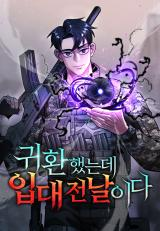

In [8]:
for komga_manga in series_missing_metadata:
    found_in_mangaUpdates = MangaUpdates.search_manga(komga_manga["metadata"]["title"])

    if(found_in_mangaUpdates == []):
        print(f"No matches for: {komga_manga['metadata']['title']}")
        time.sleep(5)
        clear_output(wait=True)
    else:
        for match in found_in_mangaUpdates:
            print(f"Komga title: {komga_manga['metadata']['title']}")
            manga = MangaUpdates(match)
            
            try:
                manga_metadata = manga.get_metadata()
            except ProviderExceptions as e:
                print(e)
                continue

            print(f"MangaUpdates Title: {manga_metadata.titles['main']}")
            display(manga_metadata.cover_art)
            apply_metadata = ask_prompt("Apply this metadata? (y)es/(n)o")
            if(apply_metadata):
                komga_session.update_series_metadata(komga_manga["id"], manga_metadata)
                break
            
            clear_output(wait=True)
        
        clear_output(wait=True)